In [1]:
%load_ext autoreload
%autoreload 2

from datasets import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import synthetic data
sd = SyntheticDataset()

In [3]:
# Time how long it takes to import synthetic data
%timeit SyntheticDataset()

477 ms ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
# Get dataset length
len(sd)

1200

In [5]:
# Set dataset number
DSN = 22

X, y = sd[DSN]

In [6]:
X.head()

,case,step,susceptible,c_infected,recovered,dead
step,,,,,,
0,BA-4-050022,0,493,7,0,0
1,BA-4-050022,1,492,8,1,1
2,BA-4-050022,2,492,8,1,1
3,BA-4-050022,3,491,9,2,1
4,BA-4-050022,4,491,9,2,1


In [7]:
X.tail()

,case,step,susceptible,c_infected,recovered,dead
step,,,,,,
202,BA-4-050022,202,65,435,365,69
203,BA-4-050022,203,65,435,365,69
204,BA-4-050022,204,65,435,365,69
205,BA-4-050022,205,65,435,365,69
206,BA-4-050022,206,65,435,366,69


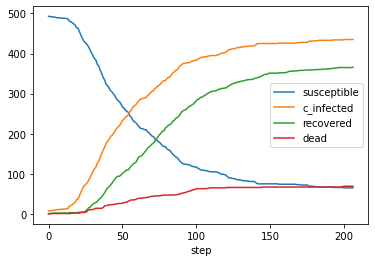

case                BA-4-050022
population                  500
initial_infected              7
infectiousness         0.186583
i_out                  0.524077
i_rec_prop             0.866436
network                      BA
k                             4
Name: 22, dtype: object

In [8]:
# Plot time series data
ax_y = ['susceptible', 'c_infected', 'recovered', 'dead']
X.plot(y=ax_y, use_index=True)
plt.show()

# Show features
y

In [9]:
# Test looping works
for X, y in sd:
    print(X.shape)

(330, 6)
(401, 6)
(401, 6)
(354, 6)
(401, 6)
(396, 6)
(384, 6)
(401, 6)
(401, 6)
(401, 6)
(392, 6)
(353, 6)
(401, 6)
(401, 6)
(401, 6)
(276, 6)
(401, 6)
(401, 6)
(401, 6)
(263, 6)
(401, 6)
(18, 6)
(207, 6)
(401, 6)
(276, 6)
(401, 6)
(332, 6)
(305, 6)
(340, 6)
(223, 6)
(401, 6)
(401, 6)
(395, 6)
(401, 6)
(372, 6)
(323, 6)
(337, 6)
(365, 6)
(401, 6)
(401, 6)
(300, 6)
(374, 6)
(401, 6)
(264, 6)
(282, 6)
(401, 6)
(401, 6)
(331, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(286, 6)
(285, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(341, 6)
(401, 6)
(401, 6)
(358, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(369, 6)
(309, 6)
(384, 6)
(307, 6)
(401, 6)
(350, 6)
(401, 6)
(319, 6)
(401, 6)
(369, 6)
(332, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(347, 6)
(359, 6)
(401, 6)
(52, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(209, 6)
(401, 6)
(288, 6)
(309, 6)
(401, 6)
(401, 6)
(401, 6)
(382, 6)
(401, 6)
(401, 6)
(370, 6)
(298, 6)
(401, 6)
(75, 6)
(401, 6)
(401, 6)
(401, 6)
(221, 6)
(165, 6)
(166, 6)
(195

(401, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(376, 6)
(7, 6)
(217, 6)
(401, 6)
(204, 6)
(401, 6)
(257, 6)
(212, 6)
(401, 6)
(371, 6)
(201, 6)
(327, 6)
(401, 6)
(176, 6)
(327, 6)
(401, 6)
(401, 6)
(231, 6)
(248, 6)
(401, 6)
(131, 6)
(401, 6)
(140, 6)
(401, 6)
(136, 6)
(401, 6)
(294, 6)
(401, 6)
(224, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(267, 6)
(332, 6)
(19, 6)
(338, 6)
(343, 6)
(284, 6)
(401, 6)
(205, 6)
(401, 6)
(281, 6)
(401, 6)
(10, 6)
(401, 6)
(297, 6)
(401, 6)
(229, 6)
(401, 6)
(318, 6)
(401, 6)
(401, 6)
(360, 6)
(236, 6)
(55, 6)
(401, 6)
(401, 6)
(401, 6)
(246, 6)
(401, 6)
(260, 6)
(401, 6)
(361, 6)
(401, 6)
(401, 6)
(401, 6)
(358, 6)
(369, 6)
(308, 6)
(401, 6)
(211, 6)
(401, 6)
(3, 6)
(375, 6)
(401, 6)
(401, 6)
(14, 6)
(401, 6)
(391, 6)
(401, 6)
(368, 6)
(388, 6)
(389, 6)
(369, 6)
(401, 6)
(250, 6)
(277, 6)
(401, 6)
(379, 6)
(401, 6)
(312, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(401, 6)
(308, 6)
(15, 6)
(401, 6)
(401, 6)
(363, 6)
(401, 6)
(345, 6)
(228, 6)
(283, 6)
(

In [10]:
# Test get by case works
X, y = sd.get_by_case('BA-4-050021')

X.head(), X.tail()

(             case  step  susceptible  c_infected  recovered  dead
 step                                                             
 0     BA-4-050021     0          498           2          0     0
 1     BA-4-050021     1          498           2          0     0
 2     BA-4-050021     2          498           2          0     0
 3     BA-4-050021     3          498           2          0     0
 4     BA-4-050021     4          497           3          0     0,
              case  step  susceptible  c_infected  recovered  dead
 step                                                             
 13    BA-4-050021    13          497           3          1     0
 14    BA-4-050021    14          497           3          2     0
 15    BA-4-050021    15          497           3          2     0
 16    BA-4-050021    16          497           3          2     0
 17    BA-4-050021    17          497           3          3     0)

In [11]:
# Obtain the split dataset
train, test = sd.split(train=0.7, test=0.3)

In [22]:
# Print length of training data
print(len(train))

# Print length of whole dataset
print(len(sd))

# Get variable
train_vars = zip(*train.tensors('network'))

# Print feature tensor
for X, y in train_vars:
    print(X.shape, y)
    break

840
1200
(401, 5) [1. 0. 0. 0.]
